#Conventional learning models
Conventional machine learning and deep learning models require training from scratch, which is computationally expensive and requires a large amount of data to achieve high performance.
They are also designed to train in isolation, where each model is separatly trained to solve some kind of specific task without any dependency on past knowledge.
The models have to be rebuilt from scratch once the feature-space distribution changes.


<center>
<img src="https://drive.google.com/uc?export=view&id=1nDp1loOeQS5C_XAxUg9aDGrczxnuemnK" width="750">

Traditional learning scheme
</center>

#Transfer learning
The idea behind this strategy is inspired by an inherent ability of humans to transfer the knowledge across different tasks.
Transfer learning is a trained model (source) that trained on large datasets is reused as the starting point for a model (target) on another related task.  
The target model utilize the knowledge that obtain from the source to deal with other related tasks.
It is a popular approach in deep learning where pre-trained models serve as the starting point on computer vision and natural language processing applications, which these tasks require large computational resources in training process.

<center>
<img src="https://drive.google.com/uc?export=view&id=1CJr4Eq6S5XK8rAaO_hlGy62Hvk1WPJvW" width="750">

<img src="https://drive.google.com/uc?export=view&id=13pcHJ-1p53-S41k8Sseij11ecmt7g6Li" width="750">

Transfer learning scheme
</center>

#Traditional ML vs Transfer Learning
1. Traditional machine learning models require training from scratch, which is computationally expensive and requires a large amount of data to achieve high performance. On the other hand, transfer learning is computationally efficient and helps achieve better results using a small data set.

2. Traditional ML has an isolated training approach where each model is independently trained for a specific purpose, without any dependency on past knowledge. Contrary to that, transfer learning uses knowledge acquired from the pre-trained model to proceed with the task. To paint a better picture of it:
One can not use the pre-trained model of ImageNet with biomedical images because ImageNet does not contain images belonging to the biomedical field.

3. Transfer learning models achieve optimal performance faster than the traditional ML models. It is because the models that leverage knowledge (features, weights, etc.) from previously trained models already understand the features. It makes it faster than training neural networks from scratch.


#Reference

https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html

https://pytorch.org/vision/stable/models.html



In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from torchvision import datasets, models, transforms
from torch import nn, optim
import torch.nn.functional as F
from sklearn import datasets
from sklearn.model_selection import train_test_split
import time
import os
import copy

from torchsummary import summary
from sklearn import preprocessing

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print('Using device', device)

Using device cpu


Number of channels: 1
Width: 8
Height: 8


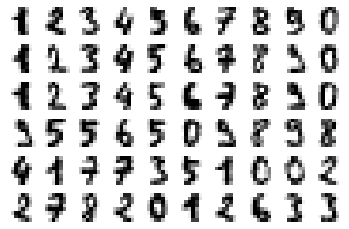

In [ ]:
NUM_CHANNEL = 1
NUM_CLASS = 10 #0-9 class

lb = preprocessing.LabelBinarizer()

digits = datasets.load_digits()

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(digits.images[index], cmap='gray_r')

_, width, height = digits.images.shape
lb.fit(digits.target)
X_train, X_test, y_train, y_test = train_test_split(digits.images.reshape(-1,1,width,height)/255, lb.transform(digits.target), train_size=0.8)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

X_train = torch.Tensor(X_train) # transform to torch tensor
y_train = torch.Tensor(y_train)
X_valid = torch.Tensor(X_valid)
y_valid = torch.Tensor(y_valid)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

print("Number of channels:",X_train.shape[1])
print("Width:",X_train.shape[2])
print("Height:",X_train.shape[3])

Tr_set = TensorDataset(X_train,y_train) # create your datset
Tr_dataloader = DataLoader(Tr_set,batch_size=32, shuffle=True) # create your dataloader
Va_set = TensorDataset(X_valid,y_valid)
Va_dataloader = DataLoader(Va_set,batch_size=32, shuffle=True)
Ts_set = TensorDataset(X_test,y_test)
Ts_dataloader = DataLoader(Ts_set,batch_size=32, shuffle=True)

## EfficientNet B0

In [ ]:
weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1 #3channel(RGB [3:224:224])
model = models.efficientnet_b0(weights=weights)

print(model.named_modules)

<bound method Module.named_modules of EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
      

In [ ]:
summary(model=model, input_size=(3, 224, 224))

for param in model.parameters():
    param.requires_grad = False

summary(model=model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
              SiLU-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
              SiLU-6         [-1, 32, 112, 112]               0
 AdaptiveAvgPool2d-7             [-1, 32, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             264
              SiLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 32, 1, 1]             288
          Sigmoid-11             [-1, 32, 1, 1]               0
SqueezeExcitation-12         [-1, 32, 112, 112]               0
           Conv2d-13         [-1, 16, 112, 112]             512
      BatchNorm2d-14         [-1, 16, 1

In [ ]:
#model.features[0][0], <<< first layer
model.features[0] = nn.Sequential(
    transforms.Resize((224,224)), #MINSTdataset(height 8: width 8)
    #change conv2d to be single layer
    nn.Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False),
    model.features[0][1],
    model.features[0][2],
)

model.classifier = nn.Sequential(
    nn.Linear(in_features=1280, out_features=NUM_CLASS),
    nn.Softmax(dim=1),
)

print(model.named_modules)
summary(model=model, input_size=(1, 224, 224))

<bound method Module.named_modules of EfficientNet(
  (features): Sequential(
    (0): Sequential(
      (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
      (1): Conv2d(1, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (3): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (

In [ ]:
weights = models.EfficientNet_B0_Weights.IMAGENET1K_V1
model = models.efficientnet_b0(weights=weights)


for param in model.parameters():
    param.requires_grad = False


class RepeatLayer(nn.Module):
    def __init__(self, *kwargs):
        super(RepeatLayer, self).__init__()
        self.size = kwargs

    def forward(self, x, ):
        return x.repeat(self.size)


model.features[0] = nn.Sequential(
    transforms.Resize((224,224)),
    RepeatLayer(1, 3, 1, 1), #1=batchsize*1,1*3=no. of channel
    model.features[0],
)

model.classifier = nn.Sequential(
    nn.Linear(in_features=1280, out_features=NUM_CLASS),
    nn.Softmax(dim=1),
)

print(model.named_modules)
summary(model=model, input_size=(1, 8, 8))

<bound method Module.named_modules of EfficientNet(
  (features): Sequential(
    (0): Sequential(
      (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
      (1): RepeatLayer()
      (2): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): SiLU(inplace=True)
      )
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
         

## ResNet50

In [ ]:
weights = models.ResNet50_Weights.IMAGENET1K_V2
model = models.resnet50(weights=weights)

print(model.named_modules)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

<bound method Module.named_modules of ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64

In [ ]:
summary(model=model, input_size=(3, 224, 224))

for param in model.parameters():
    param.requires_grad = False

summary(model=model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
       BatchNorm2d-2         [-1, 64, 112, 112]             128
              ReLU-3         [-1, 64, 112, 112]               0
         MaxPool2d-4           [-1, 64, 56, 56]               0
            Conv2d-5           [-1, 64, 56, 56]           4,096
       BatchNorm2d-6           [-1, 64, 56, 56]             128
              ReLU-7           [-1, 64, 56, 56]               0
            Conv2d-8           [-1, 64, 56, 56]          36,864
       BatchNorm2d-9           [-1, 64, 56, 56]             128
             ReLU-10           [-1, 64, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]          16,384
      BatchNorm2d-12          [-1, 256, 56, 56]             512
           Conv2d-13          [-1, 256, 56, 56]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
model.conv1 = nn.Sequential(
    transforms.Resize((224,224)),
    nn.Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False),
)

model.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=NUM_CLASS), #MINST have 10 classes
    nn.Softmax(dim=1),  #change to probability values
)

print(model.named_modules)
summary(model=model, input_size=(1, 8, 8))

<bound method Module.named_modules of ResNet(
  (conv1): Sequential(
    (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    (1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, 

In [ ]:
#another layer
weights = models.ResNet50_Weights.IMAGENET1K_V2
model = models.resnet50(weights=weights)


for param in model.parameters():
    param.requires_grad = False


class RepeatLayer(nn.Module):
    def __init__(self, *kwargs):
        super(RepeatLayer, self).__init__()
        self.size = kwargs

    def forward(self, x, ):
        return x.repeat(self.size)

model.conv1 = nn.Sequential(
    transforms.Resize((224,224)),
    RepeatLayer(1, 3, 1, 1), #3 means change greyscale to RGB
    model.conv1,
)

model.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=NUM_CLASS),
    nn.Softmax(dim=1),
)

print(model.named_modules)
summary(model=model, input_size=(1, 8, 8))

<bound method Module.named_modules of ResNet(
  (conv1): Sequential(
    (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
    (1): RepeatLayer()
    (2): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  )
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, mome

##VGG19

In [ ]:
weights = models.VGG19_Weights.IMAGENET1K_V1
model = models.vgg19(weights=weights)

print(model.named_modules)

<bound method Module.named_modules of VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, k

In [ ]:
#another layer

weights = models.VGG19_Weights.IMAGENET1K_V1
model = models.vgg19(weights=weights)




model.features[0] = nn.Sequential(
    transforms.Resize((224,224)),
    RepeatLayer(1, 3, 1, 1), #1=batchsize*1,1*3=no. of channel
    model.features[0],
)



print(model.named_modules)
summary(model=model, input_size=(1, 8, 8))

<bound method Module.named_modules of VGG(
  (features): Sequential(
    (0): Sequential(
      (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
      (1): RepeatLayer()
      (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inpla

In [ ]:
model.classifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=NUM_CLASS),
    nn.Softmax(dim=1),
)

print(model.named_modules)
summary(model=model, input_size=(1, 8, 8))

<bound method Module.named_modules of VGG(
  (features): Sequential(
    (0): Sequential(
      (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
      (1): RepeatLayer()
      (2): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inpla

##DenseNet201

In [ ]:
weights = models.DenseNet201_Weights.IMAGENET1K_V1
model = models.densenet201(weights=weights)

print(model.named_modules)

Downloading: "https://download.pytorch.org/models/densenet201-c1103571.pth" to /root/.cache/torch/hub/checkpoints/densenet201-c1103571.pth


  0%|          | 0.00/77.4M [00:00<?, ?B/s]

<bound method Module.named_modules of DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, t

In [ ]:
weights = models.DenseNet201_Weights.IMAGENET1K_V1
model = models.densenet201(weights=weights)


model.features[0] = nn.Sequential(
    transforms.Resize((224,224)),
    RepeatLayer(1, 3, 1, 1), #1=batchsize*1,1*3=no. of channel
    model.features[0],
)


model.classifier = nn.Sequential(
    nn.Linear(in_features=1920, out_features=NUM_CLASS),
    nn.Softmax(dim=1),
)

print(model.named_modules)

model(torch.rand(1,1,8,8))
#summary(model=model, input_size=(1, 8, 8))

<bound method Module.named_modules of DenseNet(
  (features): Sequential(
    (conv0): Sequential(
      (0): Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
      (1): RepeatLayer()
      (2): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    )
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1)

tensor([[0.1469, 0.1240, 0.1109, 0.0674, 0.0474, 0.1438, 0.0632, 0.0873, 0.0602,
         0.1489]], grad_fn=<SoftmaxBackward0>)

In [ ]:
model.features[0]

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)